In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import json
import jsonlines
import numpy as np


def load_jsonlines(file):
    with jsonlines.open(file, 'r') as jsonl_f:
        lst = [obj for obj in jsonl_f]
    return lst


def load_file(input_fp):
    if input_fp.endswith(".json"):
        input_data = json.load(open(input_fp))
    else:
        input_data = load_jsonlines(input_fp)
    return input_data

def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)


### HotpotQA


In [7]:
# dev set after annotations, amr_full -> format for input to sssp extraction pipeline (follow format train_chunk_id_xx_amr_full)
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot-dev-hop-non-combi_amr_full1_ctREAR3.jsonl"
data = load_file(path)

annotated_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-hotpotqa-syn-dev-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl"
annotated_data = load_file(annotated_path)

# final file to run for evaluation
# path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/output/hotpot-dev-mixed-all-gold.jsonl"
# data1 = load_file(path1)


#### TEST SET

In [7]:

annotated_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-syn-_ctREAR3-score-qwen2-72b-it-awq-TIT-47.jsonl"
annotated_data = load_file(annotated_path)

sssp_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-syn-test-annotated_merged_sssp_subg.jsonl")

In [ ]:
import random

real_retrieval = [] # exclude hop passages
mixed_hop = [] # n-1 hop passages inserted randomly
all_hops = [] # exactly the current file  
for entry in sssp_data:
    real_op = []

    allhops_op = entry["ctxs"]

    hop_passages = []
    n_hops = 0

    for _, ctx in enumerate(entry["ctxs"]):
        if ctx["id"].isdigit(): # non-hop
            real_op.append(ctx)
        else:
            hop_passages.append(ctx)
            n_hops += 1
            
    # get random indices to insert hop passages
    # replace_indices will be random n-1 numbers from 0 to n-1 hop passages
    num_hop_to_add = random.randrange(0,n_hops)
    replace_indices = random.sample(range(0, 5), num_hop_to_add)
    print(n_hops, num_hop_to_add, replace_indices)

    mixed_op = real_op
    # mixed_op = []
    offset = 0
    # for i, ctx in enumerate(entry["ctxs"]):
        
    for i, d_passage in zip(replace_indices, hop_passages[:num_hop_to_add]):
        mixed_op.insert(i + offset, d_passage)
        offset += 1
        print(mixed_op)
    # break

    real_op_entry = entry
    real_op_entry["ctxs"] = real_op
    mixed_op_entry = entry
    mixed_op_entry["ctxs"] = mixed_op
    real_retrieval.append(real_op_entry)
    mixed_hop.append(mixed_op_entry)

In [15]:
# find entried that do not have acc_LM from annotated_data
annotations = {entry["q_id"]:{c["id"]:c for c in entry["ctxs"]} for entry in annotated_data}
for entry in mixed_hop:
    qid = entry["q_id"]
    for ctx in entry["ctxs"][:5]:
        if not ctx.get("acc_LM", None):
            acc_LM = annotations[qid][ctx["id"]]["acc_LM"]
            ctx["acc_LM"] = acc_LM

In [17]:
# mixed_hop[0]
save_file_jsonl(mixed_hop, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-mixed-half-golds-annotated-sssp-subg.jsonl")

In [4]:
syn_test = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-syn-test-annotated_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl")

#### DEV SET

In [46]:
data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-half-golds_ctREAR3-score-qwen2-72b-it-awq-57-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl")

In [55]:
# From main dataset, separate into 3 variations:
dev_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/gemma-3-4b-it-hotpotqa-syn-dev-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR.jsonl"
dev_data = load_file(dev_path)

In [ ]:
import random

real_retrieval = [] # exclude hop passages
mixed_hop = [] # n-1 hop passages inserted randomly
all_hops = [] # exactly the current file  
for entry in dev_data:
    real_op = []

    allhops_op = entry["ctxs"]

    hop_passages = []
    n_hops = 0



    for _, ctx in enumerate(entry["ctxs"]):
        if ctx["id"].isdigit(): # non-hop
            real_op.append(ctx)
        else:
            hop_passages.append(ctx)
            n_hops += 1
            
    # get random indices to insert hop passages
    # replace_indices will be random n-1 numbers from 0 to n-1 hop passages
    num_hop_to_add = random.randrange(0,n_hops)
    replace_indices = random.sample(range(0, 5), num_hop_to_add)
    print(n_hops, num_hop_to_add, replace_indices)

    mixed_op = real_op
    # mixed_op = []
    offset = 0
    # for i, ctx in enumerate(entry["ctxs"]):
        
    for i, d_passage in zip(replace_indices, hop_passages[:num_hop_to_add]):
        mixed_op.insert(i + offset, d_passage)
        offset += 1
        print(mixed_op)
    # break

    real_op_entry = entry
    real_op_entry["ctxs"] = real_op
    mixed_op_entry = entry
    mixed_op_entry["ctxs"] = mixed_op
    real_retrieval.append(real_op_entry)
    mixed_hop.append(mixed_op_entry)

2 0 []


In [ ]:
save_file_jsonl(mixed_hop, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot-dev-mixed-half-golds_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR.jsonl")
save_file_jsonl(real_retrieval, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot-dev_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR.jsonl")


In [ ]:
# Format data for AMR parsing


#### TRAINING SET

In [ ]:
output = []
annotated_acc = {e["q_id"]: e for e in annotated_data}
for entry in data:
    id = entry["q_id"]
    matching_anno = annotated_acc.get(id)
    # first_non_hop = next(
    # (c for c in matching_anno["ctxs"] if c["id"].isdigit() and c.get("acc_LM") == 0),
    # None
    # ) # only for training data

    # print(first_non_hop)
    
    output_entry = {"q_id": id, 
                    "question": entry["question"],
                    "hop_passages":{},
                    "non_hop_passages":{},
                    "question_amr":entry["question_amr"],
                    "hop_passages_amr": {},
                    "non_passages_amr":{}}
    print(len(entry["ctxs"]))
    nh = 0
    h = 0
    for id,ctx in enumerate(entry["ctxs"]):

        print(ctx["id"])
        # if ctx["id"].isdigit() and ctx["id"] == first_non_hop["id"]: # non hop
        if ctx["id"].isdigit(): # non hop

        #     output_entry["non_passages_amr"]["p_{nh}_amr"] = ctx["sssp_output"]
        #     nh += 1
        # elif not ctx["id"].isdigit(): # hop passage, exclude combinations
        #     output_entry["hop_passages_amr"] = 
            c = next(c for c in matching_anno["ctxs"] if c["id"] == ctx["id"])
            output_entry["non_hop_passages"][f'p_{nh}'] = {"id": ctx["id"],"title":ctx["title"], "text": ctx["text"], "amr": ctx["sssp_output"], "acc_LM":c["acc_LM"]}
            nh += 1
        elif "+" in ctx["title"]:
            continue
        else:
            c = next(c for c in matching_anno["ctxs"] if c["id"] == ctx["id"])
            output_entry["hop_passages"][f'p_{h}'] = {"id": ctx["id"],"title":ctx["title"], "text": ctx["text"], "amr": ctx["sssp_output"],  "acc_LM":c["acc_LM"]}
            h += 1
        print(nh,h)
    output.append(output_entry)
    print(output_entry)
    break
    


8
Spanish Valley
0 1
Colorado River
0 2
Spanish Valley + Colorado River
5653626


StopIteration: 

In [ ]:
# getting first non-hop passage where acc_LM = 0
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-hotpotqa-syn-train-distil_t5_ctREAR3-score-qwen2-72b-it-awq.jsonl"
data = load_file(path)
data[0]

training_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/training_data_utility_pred.jsonl"
training_data = load_file(training_path)
    

In [32]:
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train_chunk_id_11_amr_full_merged_sssp_extracted_subg.jsonl"
path2 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train_chunk_id_12_amr_full_merged_sssp_extracted_subg.jsonl"

amr_chunk1 = load_file(path) 
# dict_keys(['q_id', 'question', 'hop_passages', 'non_hop_passages', 'question_amr', 'hop_passages_amr', 'merged_graph_disamb', 'sssp_raw_merged_graph_disamb', 'sssp_cleaned_merged_graph_disamb', 'sssp_cleaned_nodes_merged_graph_disamb', 'sssp_cleaned_label_merged_graph_disamb', 'question_concepts', 'path_node_extracted', 'labelled_node_extracted'])
print(len(amr_chunk1))
amr_chunk2 = load_file(path2)
print(len(amr_chunk2))

path3 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot_cm_train_hop_id_llm_subg.jsonl"
full_amr = load_file(path3)
# ['q_id', 'question', 'hop_passages':{p_0:['id', 'text', 'sssp_output']}, 'non_hop_passages', 'paragraphs', 'instruction', 'paragraph']
print(len(full_amr))

path5 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot-train-hop_llm_subg.jsonl"
full_subg = load_file(path5) # with combined passages
# ['question', 'answers', 'q_id', 'ctxs': ['title', 'text', 'id', 'score', 'hasanswer', 'sssp_output']]

path4 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot-train-hop_ctREAR3-score-qwen2-72b-it-awq.jsonl"
annotated_train = load_file(path4)
# ['question', 'answers', 'q_id', 'ctxs', 'golds', 'closed-book', 'instruction']

2262
2262
45224


In [ ]:
annotated_train[0]['ctxs']

In [ ]:
amr_chunk1[0]

In [ ]:
for entry in full_amr: # ['q_id', 'question', 'hop_passages: {p_0:{title, text}, p1:{} }', 'non_hop_passages', 'question_amr', 'hop_passages_amr':{p0_amr, p1_amr}]
    print(entry["hop_passages"]["p_0"].keys())
    # print(entry["sssp_cleaned_label_merged_graph_disamb"])
    break


dict_keys(['id', 'text', 'sssp_output'])


In [38]:
def merge_labelled_nodes_to_ctxs(base_data, amr_data):
    '''
    To merge base data with annotations and amr datat (train11 and train12)
    '''
    processed = 0
    for entry in annotated_train:
        # entry = e
        qid = entry["q_id"]
        ctxs = entry.get("ctxs", [])

        # Find matching AMR entry
        matching_amr = next((a for a in amr_chunk1 if a["q_id"] == qid), None)
        if not matching_amr:
            continue
        processed +=1

        hop_passages = matching_amr.get("hop_passages", {})
        labelled_nodes = matching_amr.get("labelled_node_extracted", {})
        sssp_cleaned_label_merged_graph_disamb = matching_amr.get("sssp_cleaned_label_merged_graph_disamb")
        
        # Build: title → hop index ("0", "1", etc.)
        title_to_index = {}
        idx_to_title = {}
        for p_key, p_val in hop_passages.items():
            if p_key.startswith("p_") and isinstance(p_val, dict):
                idx = p_key.split("_")[-1]
                title = p_val.get("id")
                if title is not None:
                    title_to_index[title] = idx
                    idx_to_title[idx] = title
        # Append to top 3 ctxs
        for ctx in ctxs:
            title = ctx.get("id")
            if title in title_to_index:
                idx = title_to_index[title]
                ctx["sssp_output"] = labelled_nodes.get(idx, [])
            elif "+" in title:
                ctx["sssp_output"] = sssp_cleaned_label_merged_graph_disamb

    # processed = 0
    # for entry in base_data:
    #     qid = entry["q_id"]
    #     ctxs = entry.get("ctxs", [])

    #     # Find matching AMR entry
    #     matching_amr = next((a for a in amr_data if a["q_id"] == qid), None)
    #     if not matching_amr:
    #         continue
    #     processed +=1

    #     hop_passages = matching_amr.get("hop_passages", {})
    #     labelled_nodes = matching_amr.get("labelled_node_extracted", {})
    #     sssp_cleaned_label_merged_graph_disamb = matching_amr.get("sssp_cleaned_label_merged_graph_disamb")

    #     # Build: title → hop index ("0", "1", etc.)
    #     title_to_index = {}
    #     idx_to_title = {}
    #     for p_key, p_val in hop_passages.items():
    #         if p_key.startswith("p_") and isinstance(p_val, dict):
    #             idx = p_key.split("_")[-1]
    #             title = p_val.get("id")
    #             if title is not None:
    #                 title_to_index[title] = idx
    #                 idx_to_title[idx] = title
    #     # print(title_to_index)
    #     # print(idx_to_title)
        
    #     # Append to top 3 ctxs
    #     for ctx in ctxs[:3]:
    #         title = ctx.get("id")
    #         if title in title_to_index:
    #             idx = title_to_index[title]
    #             ctx["labelled_node_extracted"] = labelled_nodes.get(idx, [])
        
    #     # Add concatenated passage ctx with acc = 0  
    #     if "0" in idx_to_title and "1" in idx_to_title:
    #         title0 = idx_to_title["0"]
    #         title1 = idx_to_title["1"]
    #         concat_title = f"{title0} + {title1}"


    #         # Try to find matching text from existing ctxs
    #         concat_texts = [ctx.get("text", "") for ctx in ctxs if ctx.get("id") in [title0, title1]]
    #         combined_text = "\n\n".join(concat_texts)

    #         ctxs.append({
    #             "id": concat_title,
    #             "title": concat_title,
    #             "text": combined_text,
    #             "acc": 0,
    #             "labelled_node_extracted": sssp_cleaned_label_merged_graph_disamb
    #         })
    # print(processed)
        
    return base_data


In [37]:
processed = 0
for e in annotated_train:
    entry = e
    qid = entry["q_id"]
    ctxs = entry.get("ctxs", [])

    # Find matching AMR entry
    matching_amr = next((a for a in amr_chunk1 if a["q_id"] == qid), None)
    if not matching_amr:
        continue
    processed +=1

    hop_passages = matching_amr.get("hop_passages", {})
    labelled_nodes = matching_amr.get("labelled_node_extracted", {})
    sssp_cleaned_label_merged_graph_disamb = matching_amr.get("sssp_cleaned_label_merged_graph_disamb")
    
    # Build: title → hop index ("0", "1", etc.)
    title_to_index = {}
    idx_to_title = {}
    for p_key, p_val in hop_passages.items():
        if p_key.startswith("p_") and isinstance(p_val, dict):
            idx = p_key.split("_")[-1]
            title = p_val.get("id")
            if title is not None:
                title_to_index[title] = idx
                idx_to_title[idx] = title
    # Append to top 3 ctxs
    for ctx in ctxs:
        title = ctx.get("id")
        if title in title_to_index:
            idx = title_to_index[title]
            ctx["sssp_output"] = labelled_nodes.get(idx, [])
        elif "+" in title:
            ctx["sssp_output"] = sssp_cleaned_label_merged_graph_disamb
    


KeyboardInterrupt: 

In [ ]:
final = merge_labelled_nodes_to_ctxs(annotated_train, amr_chunk1)
print(final[0])
final2 = merge_labelled_nodes_to_ctxs(final, amr_chunk2)

In [40]:
final2 = merge_labelled_nodes_to_ctxs(final, amr_chunk2)

In [41]:
# add rest of SSSP from full_subg: # ['question', 'answers', 'q_id', 'ctxs': ['title', 'text', 'id', 'score', 'hasanswer', 'sssp_output']]
qid_to_ctx_map = {}
for entry in full_subg:
    qid = entry['q_id']
    ctx_dict = {ctx['id']: ctx.get('sssp_output', None) for ctx in entry.get('ctxs', [])}
    qid_to_ctx_map[qid] = ctx_dict

# processed = 0
# for entry in final2:
#     qid = entry["q_id"]
#     # Find matching AMR entry
#     print(entry["ctxs"][0].keys())
#     matching_amr = next((a for a in full_subg if a["q_id"] == qid), None)
#     if not matching_amr:
#         continue
#     if "sssp_output" not in entry["ctxs"][0].keys(): # Already exists
#         print(entry)
#         # continue
#         break
processed = 0

# Update base_data with missing sssp_output
for entry in final2:
    qid = entry['q_id']
    if qid not in qid_to_ctx_map:
        continue
    
    ctx_map = qid_to_ctx_map[qid]
    for ctx in entry.get('ctxs', []):
        if 'sssp_output' not in ctx or not ctx['sssp_output']:
            ctx_id = ctx['id']
            if ctx_id in ctx_map and ctx_map[ctx_id]:
                ctx['sssp_output'] = ctx_map[ctx_id]
    processed +=1
print(processed)


45224


In [ ]:
# # Adding negative samples (non hop)
# non_hop_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpot_cm_train_non_hop_id_llm_subg.jsonl"
# non_hop = load_file(non_hop_path)
# print(json.dumps(non_hop[0], indent=2, ensure_ascii=False))


In [ ]:
# for entry in data:
#     matching_amr = next((a for a in non_hop if a["q_id"] == qid), None)

In [ ]:
# for entry in final2:
#     qid = entry["q_id"]
#     # Find matching AMR entry
#     matching_amr = next((a for a in data if a["q_id"] == qid), None) # get annotations
#     matching_non_hop_sssp = next((a for a in non_hop if a["q_id"] == qid), None) # get corresponding sssp
#     if not matching_amr or not matching_non_hop_sssp: 
#         continue
#     for ctx in matching_amr["ctxs"]:
#         if '+' in ctx["title"]:
#             continue
#         elif ctx["id"].isdigit(): 
#             if ctx["acc_LM"] == 0:
#                 non_hop_data ={
#                     "id": matching_amr["non_hop_passages"]["p_0"]["id"],
#                 "title": "",
#                 "text": matching_amr["non_hop_passages"]["p_0"]["text"],
#                 "acc": 0,
#                 "acc_LM": 0,
#                 "sssp_output": matching_amr["non_hop_passages"]["p_0"]["sssp_output"]
#                 }
#         entry["ctxs"].append(non_hop_data)

In [ ]:
def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)

save_file_jsonl(final2, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/training_data_utility_pred.jsonl")

In [ ]:
del final
del non_hop
del full_amr

In [ ]:
print(json.dumps(final2[100], indent=2, ensure_ascii=False))


In [44]:
# Adding negative samples here
llm_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/gemma-3-4b-it-hotpotqa-syn-train-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT_llm_subg.jsonl"
llm_data = load_file(llm_path)

path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/training_data_utility_pred.jsonl"
# train_data = load_file(path)

In [ ]:
llm_data[0]

In [ ]:
# find first non-hop with acc_LM = 0 for negative samples
non_hop_map = {}
for entry in llm_data:
    qid = entry["q_id"]
    for _,ctx in enumerate(entry["ctxs"]):
        if ctx["id"].isdigit(): # non-hop
            if ctx.get("acc_LM", None) == 0:
                non_hop_map[qid] = ctx
                continue
        


In [46]:
# Step 1: find non-hops with acc_LM = 0
non_hop_map = {}
for entry in llm_data:
    qid = entry["q_id"]
    found = False
    for ctx in entry["ctxs"]:
        if ctx["id"].isdigit():  # non-hop
            if ctx.get("acc_LM", None) == 0:
                non_hop_map[qid] = ctx
                found = True
                break  # stop once found one matching
    # If not found, print or collect
    if not found:
        print(f"No non-hop with acc_LM=0 for QID: {qid}")


# Step 2 (optional): see how many were missing
missing_qids = [entry["q_id"] for entry in llm_data if entry["q_id"] not in non_hop_map]
print(f"Total missing: {len(missing_qids)}")


No non-hop with acc_LM=0 for QID: 5ab698885542995eadef002a
No non-hop with acc_LM=0 for QID: 5ab5a2f85542997d4ad1f197
No non-hop with acc_LM=0 for QID: 5ab99943554299131ca42391
No non-hop with acc_LM=0 for QID: 5ab70446554299110f219a94
No non-hop with acc_LM=0 for QID: 5ab3ed12554299753aec59f3
No non-hop with acc_LM=0 for QID: 5a74f2ff5542993748c89748
No non-hop with acc_LM=0 for QID: 5a8dfbeb5542995085b3736e
No non-hop with acc_LM=0 for QID: 5ab39701554299233954ff5e
No non-hop with acc_LM=0 for QID: 5ab6e84a554299710c8d1fab
No non-hop with acc_LM=0 for QID: 5ab42ebd5542992339550047
No non-hop with acc_LM=0 for QID: 5ac068d25542996f0d89cba2
No non-hop with acc_LM=0 for QID: 5a80d30655429938b61421fe
No non-hop with acc_LM=0 for QID: 5ab72adb5542993667793f5d
No non-hop with acc_LM=0 for QID: 5ab6ef2f554299710c8d1fc5
No non-hop with acc_LM=0 for QID: 5a78ec67554299148911f9a1
No non-hop with acc_LM=0 for QID: 5abaebab55429939ce03dd66
No non-hop with acc_LM=0 for QID: 5ab9149d5542991b5579f0

In [47]:
train_data = final2
for entry in train_data:
    qid = entry["q_id"]
    # find the non hop entry and remove
    for ctx in entry["ctxs"]:
        if ctx["id"].isdigit():
            entry["ctxs"].remove(ctx)
            break
    if qid in non_hop_map:
        entry["ctxs"].append(non_hop_map[qid])

In [49]:
output = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpotqa_final_training_data_utility_pred.jsonl"

save_file_jsonl(train_data, output)

In [ ]:
# formatting to send
# syn_combi = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-combi-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl")
path = ""
data = load_file(path)

In [43]:
for entry in syn_combi:
    for ctx in entry["ctxs"]:
        if "+" in ctx["id"]: # hop passage
            continue
        else:
            ctx["acc_LM_pred"] = float('-inf')

In [45]:
save_file_jsonl(syn_combi, "for_evaluation/hotpot-syn-test-all-golds-pred.jsonl")

#### Checking utility pred evaluation

Test sets:
1. Half golds inserted: s2707044@eddie.ecdf.ed.ac.uk:/exports/eddie/scratch/s2707044/ragu/data_utility_pred/hotpot-test-mixed-half-golds-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl
2. All Golds inserted: /exports/eddie/scratch/s2707044/ragu/data_utility_pred/hotpot-syn-test-annotated_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl
3. IR i.e. non synthetic data

4. Combinations of hop passages inserted: /exports/eddie/scratch/s2707044/ragu/data_utility_pred/hotpot-test-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl

In [2]:
import jsonlines
import json
import numpy as np
from glob import glob
from sklearn import metrics

def load_jsonlines(file):
    with jsonlines.open(file, 'r') as jsonl_f:
        lst = [obj for obj in jsonl_f]
    return lst


def load_file(input_fp):
    if input_fp.endswith(".json"):
        input_data = json.load(open(input_fp))
    else:
        input_data = load_jsonlines(input_fp)
    return input_data


def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)

def save_file_json(data, fp):
    with open(fp, 'w') as f:
        json.dump(data, f)        

def auroc(y_true, y_score, verbose=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    optimal_idx = np.argmax(tpr[1:] - fpr[1:])
    optimal_threshold = thresholds[1:][optimal_idx]
    if verbose:
        print('Optimal threshold', optimal_threshold)
    del thresholds
    if verbose:
        return metrics.auc(fpr, tpr), optimal_threshold
    else:
        return metrics.auc(fpr, tpr)


def sigmoid(z):
    return 1/(1 + np.exp(-z))


# predFiles = glob('individual_eval/*.jsonl')
predDevFiles = ["/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
                "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-half-golds-annotated-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
                "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
             ]

predTestFiles =[
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-combi-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-syn-all-golds-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-syn-half-golds-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
]

predDevMusFiles = [
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-half-golds_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
]
pred2DevFiles = ["/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_m2_pred.jsonl",
                 "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_m2_pred.jsonl"]
models = ['gemma3-4b-it']
# datasets = ['nq', 'tqa', 'webq', 'squad', 'popqa3k', 'refunq']
datasets = ['hotpotqa']

# selected_400_idxs = {}
# for d in datasets:
#     f = open(f'individual_eval/{d}_test_eval_idxs.txt')
#     ids = [l.strip().split('at id=`')[1].split('`.')[0] for l in f.readlines()]
#     selected_400_idxs[d] = ids


results = {'gemma3-4b-it': {}}
for mdFile in pred2DevFiles:
    print(mdFile)
    md = load_file(mdFile)
    for d in datasets:
        if f'-{d}-' in mdFile: 
            dataset = d
            break
    for m in models:
        if f'{m}-' in mdFile: 
            model = m
            break        
    # print(dataset, len(selected_400_idxs[dataset]), selected_400_idxs[dataset][:5])
    mdPreds = [(1- sigmoid(c['acc_LM_pred'])) for item in md for c in item['ctxs'][:5]]
    # mdPreds = [c['ppl'] for item in md for c in item['ctxs'][:5]]
    mdAccuracies = [1- int(c['acc_LM']) for item in md for c in item['ctxs'][:5]]
    print("Incorrect: ", sum(mdAccuracies))
    print("Length of data:", len(mdAccuracies))
    metric_i, opt_th = auroc(mdAccuracies, mdPreds, verbose=True)
    results[models[0]][datasets[0]] = f"{round(metric_i, 2)}"
    print(f"{round(metric_i, 2)}")


for m in results.keys():
    tab_line = m 
    avg = 0
    for d in datasets:
        tab_line += ' & ' + results[m][d]
        avg += float(results[m][d])
    tab_line += ' & ' + f"{round(avg / len(datasets), 2)}" 
    print(tab_line)


/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_m2_pred.jsonl
Incorrect:  293
Length of data: 500
Optimal threshold 0.44605993714232695
0.74
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_m2_pred.jsonl
Incorrect:  377
Length of data: 500
Optimal threshold 0.8042574567575761
0.74
gemma3-4b-it & 0.74 & 0.74


In [3]:
import jsonlines
import json
import numpy as np
from glob import glob
from sklearn import metrics

def load_jsonlines(file):
    with jsonlines.open(file, 'r') as jsonl_f:
        lst = [obj for obj in jsonl_f]
    return lst


def load_file(input_fp):
    if input_fp.endswith(".json"):
        input_data = json.load(open(input_fp))
    else:
        input_data = load_jsonlines(input_fp)
    return input_data


def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)

def save_file_json(data, fp):
    with open(fp, 'w') as f:
        json.dump(data, f)        

def auroc(y_true, y_score, verbose=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    optimal_idx = np.argmax(tpr[1:] - fpr[1:])
    optimal_threshold = thresholds[1:][optimal_idx]
    if verbose:
        print('Optimal threshold', optimal_threshold)
    del thresholds
    if verbose:
        return metrics.auc(fpr, tpr), optimal_threshold
    else:
        return metrics.auc(fpr, tpr)


def sigmoid(z):
    return 1/(1 + np.exp(-z))


# predFiles = glob('individual_eval/*.jsonl')
predDevFiles = ["/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
                "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-half-golds-annotated-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
                "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
             ]

predTestFiles =[
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-combi-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-syn-all-golds-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-syn-half-golds-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
]

predDevMusFiles = [
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",
    "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-half-golds_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
]
pred2DevFiles = ["/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_m2_pred.jsonl",
                 "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl",

                 "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_m2_pred.jsonl",
                 "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl"
                 ]

models = ['gemma3-4b-it']
# datasets = ['nq', 'tqa', 'webq', 'squad', 'popqa3k', 'refunq']
datasets = ['hotpotqa']

# selected_400_idxs = {}
# for d in datasets:
#     f = open(f'individual_eval/{d}_test_eval_idxs.txt')
#     ids = [l.strip().split('at id=`')[1].split('`.')[0] for l in f.readlines()]
#     selected_400_idxs[d] = ids


results = {'gemma3-4b-it': {}}
for mdFile in pred2DevFiles:
    print(mdFile)
    md = load_file(mdFile)
    for d in datasets:
        if f'-{d}-' in mdFile: 
            dataset = d
            break
    for m in models:
        if f'{m}-' in mdFile: 
            model = m
            break        
    # print(dataset, len(selected_400_idxs[dataset]), selected_400_idxs[dataset][:5])
    mdPreds = [(1- sigmoid(c['acc_LM_pred'])) for item in md for c in item['ctxs'][:5]]
    # mdPreds = [c['ppl'] for item in md for c in item['ctxs'][:5]]
    mdAccuracies = [1- int(c['acc_LM']) for item in md for c in item['ctxs'][:5]]
    print("Incorrect: ", sum(mdAccuracies))
    print("Length of data:", len(mdAccuracies))
    metric_i, opt_th = auroc(mdAccuracies, mdPreds, verbose=True)
    results[models[0]][datasets[0]] = f"{round(metric_i, 2)}"
    print(f"{round(metric_i, 2)}")


for m in results.keys():
    tab_line = m 
    avg = 0
    for d in datasets:
        tab_line += ' & ' + results[m][d]
        avg += float(results[m][d])
    tab_line += ' & ' + f"{round(avg / len(datasets), 2)}" 
    print(tab_line)


/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_m2_pred.jsonl
Incorrect:  293
Length of data: 500
Optimal threshold 0.44605993714232695
0.74
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-mixed-all-golds_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl
Incorrect:  293
Length of data: 500
Optimal threshold 0.30771378353589207
0.7
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_m2_pred.jsonl
Incorrect:  377
Length of data: 500
Optimal threshold 0.8042574567575761
0.74
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-dev-mixed-all-golds_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl
Incorrect:  377
Length of data: 500
Optimal threshold 0.8013667011615919

In [67]:
import os
Direc = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs"
# input(r"Enter the path of the folder: ")
print(f"Files in the directory: {Direc}")
files = os.listdir(Direc)
# Filtering only the files.
files = [Direc+'/'+f for f in files if os.path.isfile(Direc+'/'+f)]
hp_dev_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
mq_dev_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-dev_ctREAR3_annotated_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"

hp_test_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-test-hop-non-combi-annotated-sssp-subg_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
mq_test_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-test_ctREAR3_annotated-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
combi_files = [hp_dev_file,mq_dev_file, hp_test_file, mq_test_file]


models = ['gemma3-4b-it']
# datasets = ['nq', 'tqa', 'webq', 'squad', 'popqa3k', 'refunq']
datasets = ['hotpot', 'musique']

# selected_400_idxs = {}
# for d in datasets:
#     f = open(f'individual_eval/{d}_test_eval_idxs.txt')
#     ids = [l.strip().split('at id=`')[1].split('`.')[0] for l in f.readlines()]
#     selected_400_idxs[d] = ids


results = {'gemma3-4b-it': {}}
for mdFile in combi_files:
    print(mdFile)
    md = load_file(mdFile)
    for d in datasets:
        if f'{d}-' in mdFile: 
            dataset = d
            break
    for m in models:
        if f'{m}-' in mdFile: 
            model = m
            break        
    # print(dataset, len(selected_400_idxs[dataset]), selected_400_idxs[dataset][:5])
    mdPreds = [(1- sigmoid(c['acc_LM_pred'])) for item in md for c in item['ctxs'][:5]]
    mdPredsPPL = [c['ppl'] for item in md for c in item['ctxs'][:5]]
    
    mdAccuracies = [1- int(c['acc_LM']) for item in md for c in item['ctxs'][:5]]
    

    print("Incorrect: ", sum(mdAccuracies))
    print("Length of data:", len(mdAccuracies))
    # print("PPL: ", mdPredsPPL)
    metric_i, opt_th = auroc(mdAccuracies, mdPreds, verbose=True)
    # results[models[0]][datasets[0]] = f"{round(metric_i, 2)}"
    metric_i_ppl, opt_th_ppl = auroc(mdAccuracies, mdPredsPPL, verbose=True)

    results[models[0]][dataset] = [f"{round(metric_i, 2)}", f"{round(metric_i_ppl, 2)}"] 

    print(f"{round(metric_i, 2)}", f"{round(metric_i_ppl, 2)}")


for m in results.keys():
    tab_line = m 
    avg = 0
    for d in datasets:
        tab_line += ' & ' + results[m][d]
        avg += float(results[m][d])
    tab_line += ' & ' + f"{round(avg / len(datasets), 2)}" 
    print(tab_line)



Files in the directory: /afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl
Incorrect:  222
Length of data: 500
Optimal threshold 0.4391465046640247
Optimal threshold 1.0000059306115148
0.79 0.71
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-dev_ctREAR3_annotated_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl
Incorrect:  321
Length of data: 500
Optimal threshold 0.47385998583298394
Optimal threshold 1.0386998920367871
0.75 0.74
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-test-hop-non-combi-annotated-sssp-subg_llm_subg-po

TypeError: can only concatenate str (not "list") to str

My approach works better with combinations of data. looking at AUROC of acc_LM and ppl. To improve perf of graph utility on non-hop passages, i need to add in more enough negative samples. 

I need to show how graph utility works for predicting individual utility graphs. 
Report metrics with inputs graph with multiple hop/individual hop/non hop passages

This above metric is for wtv i have written here. 

In [68]:
import os
Direc = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs"
# input(r"Enter the path of the folder: ")
print(f"Files in the directory: {Direc}")
files = os.listdir(Direc)
# Filtering only the files.
files = [Direc+'/'+f for f in files if os.path.isfile(Direc+'/'+f)]
hp_dev_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
mq_dev_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-dev_ctREAR3_annotated_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"

hp_test_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-test-hop-non-combi-annotated-sssp-subg_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
mq_test_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-test_ctREAR3_annotated-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
combi_files = [hp_dev_file,mq_dev_file, hp_test_file, mq_test_file]


models = ['gemma3-4b-it']
# datasets = ['nq', 'tqa', 'webq', 'squad', 'popqa3k', 'refunq']
datasets = ['hotpot', 'musique']

# selected_400_idxs = {}
# for d in datasets:
#     f = open(f'individual_eval/{d}_test_eval_idxs.txt')
#     ids = [l.strip().split('at id=`')[1].split('`.')[0] for l in f.readlines()]
#     selected_400_idxs[d] = ids


results = {'gemma3-4b-it': {}}
for mdFile in files:
    print(mdFile)
    md = load_file(mdFile)
    for d in datasets:
        if f'{d}-' in mdFile: 
            dataset = d
            break
    for m in models:
        if f'{m}-' in mdFile: 
            model = m
            break        
    # print(dataset, len(selected_400_idxs[dataset]), selected_400_idxs[dataset][:5])
    mdPreds = [(1- sigmoid(c['acc_LM_pred'])) for item in md for c in item['ctxs'][:5]]
    mdPredsPPL = [c['ppl'] for item in md for c in item['ctxs'][:5]]
    
    mdAccuracies = [1- int(c['acc_LM']) for item in md for c in item['ctxs'][:5]]
    

    print("Incorrect: ", sum(mdAccuracies))
    print("Length of data:", len(mdAccuracies))
    # print("PPL: ", mdPredsPPL)
    metric_i, opt_th = auroc(mdAccuracies, mdPreds, verbose=True)
    # results[models[0]][datasets[0]] = f"{round(metric_i, 2)}"
    metric_i_ppl, opt_th_ppl = auroc(mdAccuracies, mdPredsPPL, verbose=True)

    results[models[0]][dataset] = [f"{round(metric_i, 2)}", f"{round(metric_i_ppl, 2)}"] 

    print(f"{round(metric_i, 2)}", f"{round(metric_i_ppl, 2)}")


for m in results.keys():
    tab_line = m 
    avg = 0
    for d in datasets:
        tab_line += ' & ' + results[m][d]
        avg += float(results[m][d])
    tab_line += ' & ' + f"{round(avg / len(datasets), 2)}" 
    print(tab_line)



Files in the directory: /afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-dev-mixed-all-golds_ctREAR3-score-qwen2-72b-it-awq-TIT_AMR_merged_sssp_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl
Incorrect:  293
Length of data: 500
Optimal threshold 0.30560245551794984
Optimal threshold 1.0184910297096414
0.69 0.72
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-dev-mixed-half-golds-annotated-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl
Incorrect:  365
Length of data: 500
Optimal threshold 0.6432551081046187
Optimal threshold 1.0045729950871674
0.67 0.71
/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-syn-test-annotated_

KeyError: 'ppl'

RAGT5 evaluation (top 5 passages): 

1. Get results of setting B, knowing which are hop hop_passages

LLM to extract SSSP pasage by passage, identifying non-hop passages in the process 
2. Prompt LLM with concatenated

If we input with combinations of passages in t5, the resulting input SSSP will be too big

Strategy B with LLM: ORACLE for synthetic, LLM classifier used for IR. RAGT5 -> combine hop passages -> extract sssp using LLM OR RAGT5 -> LLM to classify hop or not hop -> concatenate the hops -> extract sssp using LLM (CONSISTENT to use LLM extract)

*19 AUG:*
Incorrect = 1, Correct = 0. Negating. Detect incorretness. 

Problem: Eval based on entire dev/test, not sure which cases are exactly represented. It is usually easy to answer with 1 passage. Therefore, we want to evaluate/predict on cases where model will answer incorrectly. 

Solution: Get instances for what I want to evaluate. 

Combinations of passages: For n hops, acc_LM=0, concatnated acc_LM = 1

syn-all** : RAGT5 will be correct and require >1 hop passage

partial: leave out only passage that was answered incorrectly; cases where model require all hops present, remove one hop to see if model will answer incorrectly;


Partial: cases where p1 = 1, p2 = 0, keep p2 to predict if model can still answer correctly

In [34]:
# Qualitative Analysis on combinations_hop of Dev and Test Set
combi_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/hotpot-test-combi-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl")
# combi_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE.jsonl")

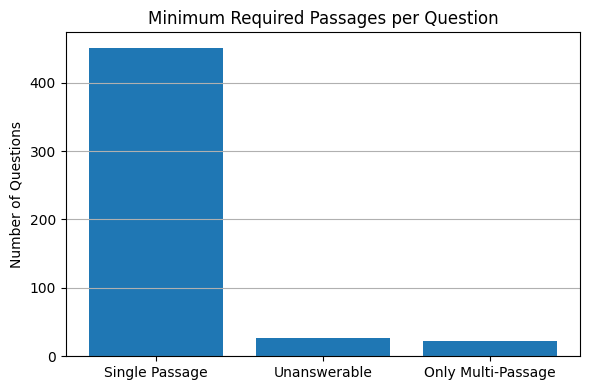

In [21]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import json
import jsonlines
import numpy as np
import argparse
import os

# Categorize each question
category_counts = Counter()
category_index = {'Single Passage':[], 'Only Multi-Passage':[], 'Unanswerable':[]}
for entry in combi_data:
    single_correct = False
    multi_correct = False

    for ctx in entry['ctxs']:
        acc = ctx.get('acc_LM', 0)
        is_combo = '+' in ctx['id'] # For concatenated passages 

        if acc:
            if is_combo:
                multi_correct = True
            else:
                single_correct = True

    if single_correct:
        category_counts['Single Passage'] += 1
        category_index['Single Passage'].append(entry['q_id'])
    elif multi_correct:
        category_counts['Only Multi-Passage'] += 1
        category_index['Only Multi-Passage'].append(entry['q_id'])
    else:
        category_counts['Unanswerable'] += 1
        category_index['Unanswerable'].append(entry['q_id'])

# Bar chart
labels = list(category_counts.keys())
values = [category_counts[k] for k in labels]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title('Minimum Required Passages per Question')
plt.ylabel('Number of Questions')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [22]:
len(category_index["Only Multi-Passage"]) #22 questions out of 500 in test set require multiple passages, 0 out of 100 require multiple in dev set

22

In [ ]:
for qid in category_index["Only Multi-Passage"]:
    matching = next((a for a in combi_data if a["q_id"] == qid), None)
    if matching:
        print("QID: ", qid)
        print(matching["question"])
        for ctx in matching["ctxs"]:
            print(ctx)


### Musique

In [ ]:
# path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique_full_v1.0_dev.jsonl"
# path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique_ans_v1.0_dev.jsonl"

# dev_full = load_file(path)
# dev_ans = load_file(path1)

# dev_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique_ans_v1.0_dev.jsonl"
# musique_dev_data = load_file(dev_path)
train_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique_ans_v1.0_train.jsonl"
musique_train_data = load_file(train_path)

# annotated_musique_dev = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-dev-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl")
annotated_musique_train = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-train-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl")

In [ ]:
from itertools import combinations

musique_by_qid = {_d["id"]: _d for _d in musique_train_data}
mixed_data = []
for entry in annotated_musique_train:
    qid = entry["q_id"]
    # qid = entry["question_id"]

    musique_entry = musique_by_qid.get(qid)

    if not musique_entry:
        print(f"No distractor match for q_id: {qid}. Skipping.")
        continue
    answerable = musique_entry["answerable"]
    if not answerable:
        continue
    # Extract hop passages from "question_decomposition"
    hops_idx = [hop["paragraph_support_idx"] for hop in musique_entry["question_decomposition"]]
    print(hops_idx)
    hop_passages = [psg for psg in musique_entry["paragraphs"] if psg["idx"] in hops_idx] # or psg["is_supporting"]== True
    # print(hop_passages)

    # build combinations
    combined_passages = []
    for r in range(1, len(hop_passages) + 1):
        for combo in combinations(hop_passages, r):
            combined_title = " + ".join(p["title"] for p in combo)
            combined_text = "\n\n".join(p["paragraph_text"] for p in combo)
            combined_passages.append({
                "title": combined_title,
                "text": combined_text,
                "id": combined_title,  # or any unique identifier
                "score": "0.0",
                "hasanswer": True,
                'is_supporting': True
            })
    print(len(hop_passages), len(combined_passages))
    # print(combined_passages)
    # print(entry["ctxs"])
    # break
    entry["ctxs"] = combined_passages + entry["ctxs"]
    mixed_data.append(entry)    
    


[5, 9]
2 3
[6, 10]
2 3
[17, 0]
2 3
[17, 12]
2 3
[3, 11]
2 3
[14, 11]
2 3
[10, 5]
2 3
[0, 10]
2 3
[14, 8]
2 3
[17, 4]
2 3
[16, 2]
2 3
[0, 16]
2 3
[11, 13]
2 3
[15, 3]
2 3
[17, 18]
2 3
[17, 12]
2 3
[15, 17]
2 3
[13, 4]
2 3
[14, 8]
2 3
[9, 3]
2 3
[4, 15]
2 3
[15, 6]
2 3
[7, 10]
2 3
[9, 12]
2 3
[3, 7]
2 3
[15, 8]
2 3
[17, 6]
2 3
[18, 9]
2 3
[17, 15]
2 3
[12, 16]
2 3
[8, 1]
2 3
[6, 17]
2 3
[17, 13]
2 3
[12, 5]
2 3
[10, 8]
2 3
[14, 13]
2 3
[3, 16]
2 3
[4, 2]
2 3
[12, 3]
2 3
[2, 19]
2 3
[2, 14]
2 3
[17, 8]
2 3
[6, 14]
2 3
[3, 10]
2 3
[16, 2]
2 3
[1, 0]
2 3
[14, 18]
2 3
[18, 0]
2 3
[17, 7]
2 3
[6, 8]
2 3
[16, 17]
2 3
[8, 7]
2 3
[0, 6]
2 3
[8, 19]
2 3
[6, 4]
2 3
[4, 15]
2 3
[13, 12]
2 3
[16, 15]
2 3
[18, 4]
2 3
[4, 11]
2 3
[16, 7]
2 3
[5, 18]
2 3
[3, 12]
2 3
[9, 1]
2 3
[7, 14]
2 3
[8, 4]
2 3
[4, 17]
2 3
[1, 14]
2 3
[0, 4]
2 3
[17, 15]
2 3
[19, 18]
2 3
[10, 6]
2 3
[6, 4]
2 3
[1, 11]
2 3
[18, 14]
2 3
[16, 0]
2 3
[4, 13]
2 3
[13, 4]
2 3
[2, 8]
2 3
[19, 9]
2 3
[12, 8]
2 3
[19, 11]
2 3
[0, 10]
2 3
[

In [ ]:
def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)

save_file_jsonl(mixed_data, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique-train-hop-combi.jsonl")

In [14]:
from random import randrange, sample
# Load RAG file
rag_path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-train-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl"
rag_data = load_file(rag_path)

# Load hotpotqa file
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique_ans_v1.0_train.jsonl"
musique_data = load_file(path)

# Build qid index 
mus_by_qid = {_d["id"]: _d for _d in musique_data}

# Process data
mixed_data = []
for rag_entry in rag_data:
    qid = rag_entry["q_id"]
    musique_entry = mus_by_qid.get(qid)

    if not musique_entry:
        print(f"No match for q_id: {qid}. Skipping.")
        continue
    
    # Extract hop passages from "question_decomposition"
    hops_idx = [hop["paragraph_support_idx"] for hop in musique_entry["question_decomposition"]]
    # print(hops_idx)
    hop_passages = [psg for psg in musique_entry["paragraphs"] if psg["idx"] in hops_idx] # or psg["is_supporting"]== True
    # print(hop_passages)

    replace_mode = "first_and_random"
    replace_count = 0
    # Pick passages to replace in RAG
    rag_ctxs = rag_entry.get("ctxs", [])
    
    if replace_mode == "top":
        replace_indices = list(range(replace_count))
    elif replace_mode == "first_and_random":
        n_to_replace = len(hop_passages)
        replace_indices = [0]
        replace_indices += sample([1, 2, 3, 4], n_to_replace - 1)
        print(replace_indices, n_to_replace)

    # Replace passages
    # new_ctxs = rag_ctxs[:5]
    for i, d_passage in zip(replace_indices, hop_passages):
        rag_ctxs[i] = d_passage
        # print(rag_ctxs[i])
        # break

    rag_entry["ctxs"] = rag_ctxs
    print(len(rag_entry["ctxs"]))
    # print(rag_entry["ctxs"])
    mixed_data.append(rag_entry)

[0, 1] 2
10
[0, 4] 2
10
[0, 3] 2
10
[0, 2] 2
10
[0, 1] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 4] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 4] 2
10
[0, 3] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 2] 2
10
[0, 3] 2
10
[0, 3] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 3] 2
10
[0, 1] 2
10
[0, 3] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 3] 2
10
[0, 3] 2
10
[0, 2] 2
10
[0, 2] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 2] 2
10
[0, 3] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 1] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 2] 2
10
[0, 3] 2
10
[0, 4] 2
10
[0, 4] 2
10
[0, 3] 2
10
[0, 2] 2
10
[0, 3] 2
10
[0, 3] 2
10
[0, 2] 2
10
[0, 4] 2
10
[0, 2] 2
10
[0, 2] 2
10
[0, 3] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 1] 2
10
[0, 3] 2
10
[0, 4] 2
10
[0, 3] 2
10
[0, 4] 2
10
[0, 1] 2
10
[0, 

In [16]:
save_file_jsonl(mixed_data, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique-train-syn.jsonl")

#### Synthesising Training data

In [3]:
# AMR = 1994
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-train-combi_AMR_merged_sssp_subg.jsonl"
data = load_file(path)
print(len(data))
# LLM = 19938 
path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-train-hop-combi_llm_subg.jsonl"
llm_data = load_file(path1)
print(len(llm_data))

# annotated_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-combi-train-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl")
# get extra annotations from /afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-train-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl
annotated_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-combi-train-sssp_ctREAR3_annotated.jsonl")
print(len(annotated_data))

1994
19938
19938


In [ ]:
data[0]

In [ ]:
llm_data[0]

In [7]:
annotated_data[0]

{'question': 'When was the institute that owned The Collegian founded?',
 'answers': ['1960'],
 'q_id': '2hop__482757_12019',
 'ctxs': [{'title': 'The Collegian (Houston Baptist University)',
   'text': 'The Collegian is the bi-weekly official student publication of Houston Baptist University in Houston, Texas. It was founded in 1963 as a newsletter, and adopted the newspaper format in 1990.',
   'id': 'The Collegian (Houston Baptist University)',
   'score': '0.0',
   'hasanswer': True,
   'is_supporting': True,
   'output': '1963',
   'toklogprob': [-6.437280717364047e-06, 0.0, 0.0, 0.0],
   'EM': False,
   'F1': 0.0,
   'acc': 0,
   'nll': 1.6093201793410117e-06,
   'ppl': 1.0000016093214743,
   'rougeL': 0,
   'NLI': 0.77783203125,
   'acc_LM': 0},
  {'title': 'Houston',
   'text': "Several private institutions of higher learning—ranging from liberal arts colleges, such as The University of St. Thomas, Houston's only Catholic university, to Rice University, the nationally recognize

In [4]:
amr_data = {entry["q_id"]: entry for entry in data}
p = 0
skipped = 0
for entry in llm_data:
    qid = entry["q_id"]
    if qid in amr_data:
        matching_amr = amr_data[qid]
        entry["ctxs"] = matching_amr["ctxs"]
        p += 1
    else:
        skipped += 1
        continue
print(p, skipped)

1994 17944


In [ ]:
for entry in llm_data:
    qid = entry["q_id"]
    matching_annotation = next((a for a in annotated_data if a["q_id"] == qid), None)
    if not matching_annotation:
        continue
    

In [5]:
for entry in annotated_data:
    qid = entry["q_id"]
    matching = next((a for a in llm_data if a["q_id"] == qid), None)
    if not matching:
        print(qid)
        continue
    for ctx in entry["ctxs"]:
        c = next(c for c in matching["ctxs"] if c["id"] == ctx["id"])
        ctx["sssp_output"] = c["sssp_output"]


In [6]:
annotated_data[19067]["ctxs"]

[{'title': 'Black Friday (shopping)',
  'text': "The earliest evidence of the phrase Black Friday applied to the day after Thanksgiving in a shopping context suggests that the term originated in Philadelphia, where it was used to describe the heavy and disruptive pedestrian and vehicle traffic that would occur on the day after Thanksgiving. This usage dates to at least 1961. More than twenty years later, as the phrase became more widespread, a popular explanation became that this day represented the point in the year when retailers begin to turn a profit, thus going from being ``in the red ''to being`` in the black''.",
  'id': 'Black Friday (shopping)',
  'score': '0.0',
  'hasanswer': True,
  'is_supporting': True,
  'output': 'This question cannot be answered from the provided text.',
  'toklogprob': [-0.10363645851612091,
   -0.1269286721944809,
   -0.01636793091893196,
   0.0,
   -1.1920928244535389e-07,
   -0.18475349247455597,
   -8.344646857949556e-07,
   -0.000592890428379178,

In [15]:
save_file_jsonl(annotated_data, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-combi-train-sssp.jsonl")

In [ ]:
annotated_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-combi-train-sssp.jsonl")
import json
import jsonlines
import numpy as np


def load_jsonlines(file):
    with jsonlines.open(file, 'r') as jsonl_f:
        lst = [obj for obj in jsonl_f]
    return lst


def load_file(input_fp):
    if input_fp.endswith(".json"):
        input_data = json.load(open(input_fp))
    else:
        input_data = load_jsonlines(input_fp)
    return input_data

def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)

path = "data_utility_pred/musique-combi-dev_ctREAR3_annotated_llm_subg.jsonl"
data = load_file(path)
print("loaded: ", len(data))
for entry in data:
    output = []
    nh = 0
    for ctx in entry["ctxs"]:
        if ctx["id"].isdigit() and nh < 1:
            output.append(ctx)
            nh += 1
        elif not ctx["id"].isdigit() or "+" in ctx["id"]:
            output.append(ctx)
        else:
            continue
    entry["ctxs"] = output

In [14]:
annotated_data[19067]

{'question': 'What are the biggest terrorist attacks by the group with which Bush said the war on terror begins against the country where Black Friday originated?',
 'answers': ['the 9/11 attacks'],
 'q_id': '4hop3__55666_362455_28338_160498',
 'ctxs': [{'title': 'Black Friday (shopping)',
   'text': "The earliest evidence of the phrase Black Friday applied to the day after Thanksgiving in a shopping context suggests that the term originated in Philadelphia, where it was used to describe the heavy and disruptive pedestrian and vehicle traffic that would occur on the day after Thanksgiving. This usage dates to at least 1961. More than twenty years later, as the phrase became more widespread, a popular explanation became that this day represented the point in the year when retailers begin to turn a profit, thus going from being ``in the red ''to being`` in the black''.",
   'id': 'Black Friday (shopping)',
   'score': '0.0',
   'hasanswer': True,
   'is_supporting': True,
   'output': 'T

In [ ]:
import random

# combine with training 
def combine_jsonl(file1, file2, output_file):
    lines = []

    # Read all lines from both files
    with open(file1, "r", encoding="utf-8") as f1:
        lines.extend([line.strip() for line in f1 if line.strip()])

    with open(file2, "r", encoding="utf-8") as f2:
        lines.extend([line.strip() for line in f2 if line.strip()])

    # Shuffle them randomly
    random.shuffle(lines)

    # Write back to output
    with open(output_file, "w", encoding="utf-8") as fout:
        for line in lines:
            fout.write(line + "\n")

path1 = "data_utility_pred/musique-combi-dev_ctREAR3_annotated_llm_subg_fortrain.jsonl"
path2 = "data_utility_pred/hotpot-dev-hop-non-combi-annotated-sssp-subg.jsonl"
output = "data_utility_pred/musique-hotpotqa-combi-dev_ctREAR3_annotated_llm_subg_fortrain.jsonl"
combine_jsonl(path1, path2, output)

In [18]:
combine_jsonl("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/hotpotqa_final_training_data_utility_pred.jsonl","/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-combi-train-sssp.jsonl", "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/train/musique-hotpotqa-training.jsonl")

In [ ]:
dev_hp = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/hotpot-dev-hop-non-combi-annotated-sssp-subg.jsonl")
dev_mus = load_file("")

!!!! GET Mus syn, Hotpot test syn, special case hotpot+mus syn test and dev

#### DEV SET

In [96]:
# dev_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-combi-dev-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl")

test_data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-combi-test-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl")

In [97]:
import random

# real_retrieval = [] # exclude hop passages
mixed_hop = [] # n-1 hop passages inserted randomly
all_hops = [] 
for entry in test_data:
    real_op = []

    hop_passages = []
    n_hops = 0


    for _, ctx in enumerate(entry["ctxs"]):
        if ctx["id"].isdigit(): # non-hop
            real_op.append(ctx)
        elif "+" in ctx["id"]:
            continue
        else:
            hop_passages.append(ctx)
            n_hops += 1
            
    # all hops: insert one at the top, another one randomly (actl not necessary)
    all_hops_op = hop_passages + real_op[:5-n_hops]
    # print(all_hops_op)
    
    assert len(all_hops_op) == 5

    all_op_entry = entry.copy()
    all_op_entry["ctxs"] = all_hops_op
    # get random indices to insert hop passages
    # replace_indices will be random n-1 numbers from 0 to n-1 hop passages
    num_hop_to_add = random.randrange(0,n_hops)
    replace_indices = random.sample(range(0, 5), num_hop_to_add)
    print(n_hops, num_hop_to_add, replace_indices)

    mixed_op = real_op
    offset = 0        
    for i, d_passage in zip(replace_indices, hop_passages[:num_hop_to_add]):
        mixed_op.insert(i + offset, d_passage)
        offset += 1


    # print(all_op_entry)
    # real_op_entry = entry
    # real_op_entry["ctxs"] = real_op
    mixed_op_entry = entry.copy()
    mixed_op_entry["ctxs"] = mixed_op
    # real_retrieval.append(real_op_entry)
    mixed_hop.append(mixed_op_entry)
    all_hops.append(all_op_entry)

2 1 [2]
2 0 []
2 1 [2]
3 0 []
2 0 []
2 1 [2]
4 2 [4, 2]
4 2 [4, 1]
2 0 []
2 0 []
2 1 [0]
3 2 [0, 3]
2 0 []
2 0 []
4 3 [2, 4, 1]
2 1 [0]
2 0 []
3 1 [2]
2 0 []
2 1 [3]
2 1 [3]
2 0 []
2 1 [4]
2 0 []
3 2 [3, 0]
2 1 [4]
3 2 [0, 2]
2 0 []
2 0 []
2 0 []
2 0 []
2 1 [3]
4 1 [3]
3 1 [3]
3 0 []
4 2 [1, 4]
2 1 [2]
3 1 [1]
2 0 []
4 1 [4]
2 0 []
3 1 [3]
2 1 [3]
3 0 []
3 2 [2, 3]
2 0 []
2 1 [2]
3 2 [3, 2]
3 2 [2, 1]
3 1 [3]
3 0 []
2 1 [1]
3 2 [2, 3]
4 3 [1, 2, 4]
2 0 []
2 0 []
3 0 []
2 0 []
3 1 [4]
2 1 [4]
4 1 [3]
3 2 [1, 3]
3 2 [3, 1]
3 2 [2, 1]
2 1 [4]
3 1 [4]
2 0 []
4 3 [4, 1, 0]
2 1 [4]
3 2 [0, 2]
2 0 []
2 0 []
4 2 [1, 2]
3 1 [4]
3 0 []
2 0 []
2 1 [1]
2 1 [3]
2 1 [2]
2 0 []
4 1 [2]
2 0 []
3 1 [2]
2 0 []
3 2 [1, 3]
3 1 [4]
3 2 [4, 3]
2 1 [3]
2 1 [0]
2 1 [3]
2 1 [4]
3 0 []
3 1 [3]
2 0 []
3 0 []
2 0 []
3 2 [1, 3]
4 3 [3, 4, 0]
2 0 []
4 3 [4, 3, 2]
3 1 [2]
2 0 []
4 2 [0, 2]
3 0 []
2 0 []
2 0 []
2 0 []
2 1 [0]
3 2 [1, 4]
2 1 [4]
3 1 [1]
2 0 []
2 1 [0]
3 1 [2]
3 0 []
2 0 []
2 1 [0]
2 0 []
2 0 []
2 1 [1

In [100]:
save_file_jsonl(mixed_hop, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/musique-test-mixed-half-golds.jsonl")
save_file_jsonl(all_hops, "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/test/musique-test-mixed-all-golds.jsonl")

In [ ]:
# check if top 5 has acc_lm
import json
import jsonlines
import numpy as np


def load_jsonlines(file):
    with jsonlines.open(file, 'r') as jsonl_f:
        lst = [obj for obj in jsonl_f]
    return lst


def load_file(input_fp):
    if input_fp.endswith(".json"):
        input_data = json.load(open(input_fp))
    else:
        input_data = load_jsonlines(input_fp)
    return input_data

def save_file_jsonl(data, fp):
    with jsonlines.open(fp, mode='w') as writer:
        writer.write_all(data)

path = "musique-hotpotqa-dev.jsonl"
data = load_file(path)
for entry in data:
    for i,ctx in enumerate(entry["ctxs"]):
        if ctx.get("acc_LM", "") == "":
            print(i, entry["id"])
            print("annotation needed")

In [ ]:
load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-combi-dev-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl")

In [ ]:
data = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/dev/musique-hotpotqa-dev.jsonl")
for entry in data:
    for i,ctx in enumerate(entry["ctxs"]):
        if ctx.get("acc_LM", "") == "":
            print(i, entry["q_id"])
            print(entry["ctxs"][5])
            print("annotation needed")
            break

## Checking -combi- data

In [4]:
hp_dev_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-dev-hop-non-combi-annotated-sssp-subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
mq_dev_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-dev_ctREAR3_annotated_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"

hp_test_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/hotpot-test-hop-non-combi-annotated-sssp-subg_llm_subg-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"
mq_test_file = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/utilitypred-data/utilitypred-data/utility_pred_model_outputs/musique-combi-test_ctREAR3_annotated-point_0.0acc_LM_1.00be_error_pred_wTITLE_m2.jsonl"

In [5]:
hp_dev = load_file(hp_dev_file)
mq_dev = load_file(mq_dev_file)

hp_test = load_file(hp_test_file)
mq_test = load_file(mq_test_file)

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import json
import jsonlines
import numpy as np
import argparse
import os

def get_hop_analysis(data):
    '''
    For HotPotQA
    '''
    # Categorize each question
    category_counts = Counter()
    category_index = {'Single Passage':[], 'Only Multi-Passage':[], 'Unanswerable':[]}
    for entry in data:
        single_correct = False
        multi_correct = False

        for ctx in entry['ctxs']:
            acc = ctx.get('acc_LM', 0)
            is_combo = '+' in ctx['id'] # For concatenated passages 

            if acc:
                if is_combo:
                    multi_correct = True
                else:
                    single_correct = True

        if single_correct:
            category_counts['Single Passage'] += 1
            category_index['Single Passage'].append(entry['q_id'])
        elif multi_correct:
            category_counts['Only Multi-Passage'] += 1
            category_index['Only Multi-Passage'].append(entry['q_id'])
        else:
            category_counts['Unanswerable'] += 1
            category_index['Unanswerable'].append(entry['q_id'])

    # Bar chart
    labels = list(category_counts.keys())
    values = [category_counts[k] for k in labels]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, values)
    plt.title('Minimum Required Passages per Question')
    plt.ylabel('Number of Questions')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()
    return category_counts, category_index


In [7]:
def get_hop_analysis_musique(data):
    """
    For MuSiQue
    """
    category_counts = Counter()
    category_index = {'Less than n hop Passages':[], 'Only Multi-Passage':[], 'Unanswerable':[]}
    for entry in data:
        single_correct = False
        multi_correct = False
        hops = entry["q_id"][0] # number of "+" we want to find in a title
        # print(entry["q_id"], hops)
        # break
        for ctx in entry['ctxs']:
            acc = ctx.get('acc_LM', 0)
            # print(ctx["id"])
            is_combo = False
            if ctx["id"].count("+") == int(hops)-1:
                is_combo = True # Find the ctx where text has all hops present
            # is_combo = '+' in ctx['id'] # For concatenated passages 
            # print("acc: ", acc, "is_combo: ", is_combo)
            if acc == 1:
                if is_combo:
                    multi_correct = True
                else:
                    single_correct = True
        if single_correct:
                # print(entry["q_id"], multi_correct)
                category_counts['Less than n hop Passages'] += 1
                category_index['Less than n hop Passages'].append(entry['q_id'])
        elif multi_correct:
            # print(entry["q_id"])
            category_counts['Only Multi-Passage'] += 1
            category_index['Only Multi-Passage'].append(entry['q_id'])
        else:
            category_counts['Unanswerable'] += 1
            category_index['Unanswerable'].append(entry['q_id'])
        
    # Bar chart
    labels = list(category_counts.keys())
    values = [category_counts[k] for k in labels]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, values)
    plt.title('Minimum Required Passages per Question')
    plt.ylabel('Number of Questions')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()
    return category_counts, category_index



p1 0, p2 1 -> p1p2 (ideally acc_LM = 0 cannot answer correctly, but parametric knowledge can help acc_LM = 1?)

In scenarios where n-1 hops are present and acc_LM = 1, parametric knowledge is employed. -> n-2 hops present and acc_LM = 1, strong parametric knowledge;  
n-2 hops present and acc_LM = 0, ssomething lacking. 

In scenarios where all n hops are present and acc_LM = 0, lack of knowledge therefore utility of retrieved passages is none.

get hop analysis for MUSIQUE data: only answerable when all (2,3,4) hop passages are present

1 out of 2: LLM cannot answer

1 or 2 out of 3: predict incorrect (1)

1/2/3 out of 4: predict incorrect (1)

Hypothesis: LLM can only answer the question if ALL hops are present. (predict correct, 0)

unanswerable when none available, answerable if at least 1 hop present? 

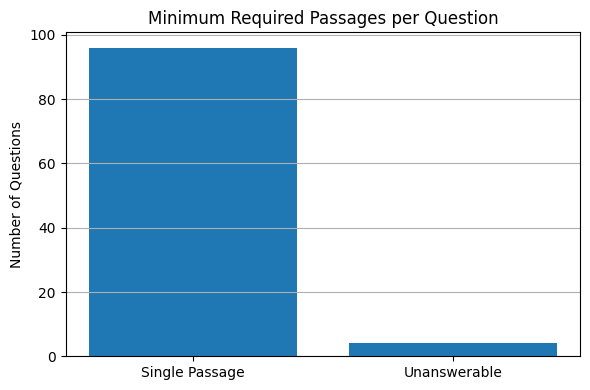

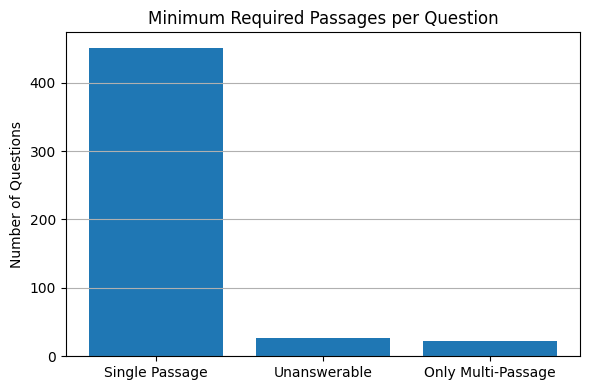

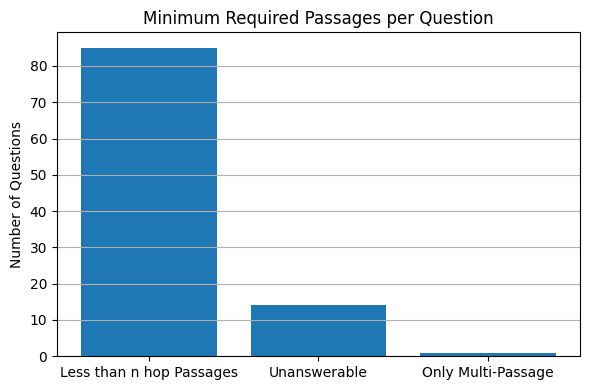

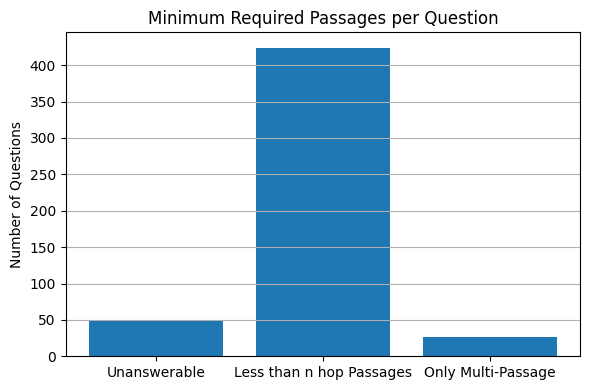

In [8]:
hp_dev_category_counts, hp_dev_category_index = get_hop_analysis(hp_dev)
# print("HotPot Dev: ", hp_dev_category_counts)

hp_test_category_counts, hp_test_category_index = get_hop_analysis(hp_test)
# print("Hotpot Test: ", hp_test_category_counts)

mq_dev_category_counts, mq_dev_category_index = get_hop_analysis_musique(mq_dev)
# print("MuSiQue Dev: ", mq_dev_category_counts)

mq_test_category_counts, mq_test_category_index = get_hop_analysis_musique(mq_test)
# print("MuSiQue Dev: ", mq_test_category_counts)

Evaluation of RAGT5:
Special cases: all mutli-passage, all unanswerable and 30-40 single passage (ms and hp each)

-Combi-

Add that in the folder

In [9]:
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-hotpotqa-syn-test-RAGQAt5_ctREAR3-qwen2-72b-it-awq.jsonl"
path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-syn-test-RAGQAt5_ctREAR3-qwen2-72b-it-awq.jsonl"

pathS = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-hotpotqa-syn-test-samples_t5_ctREAR3.jsonl"
pathS1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-syn-test-samples_t5_ctREAR3.jsonl"

hp1 = load_file(path)
mq1 = load_file(path1)

hp2 = load_file(pathS)
mq2 = load_file(pathS1)

In [10]:
hp = []
cnt = 0
for entry in hp1:
    # hops = "Less than n hop Passages"
    hops = "Single Passage"
    if entry["q_id"] in hp_test_category_index['Only Multi-Passage']:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index["Unanswerable"]:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index[hops] and cnt <= 40:
        hp.append(entry)
        cnt += 1
print(len(hp))

90


In [ ]:
mus = []
cnt = 0
for entry in mq1:
    hops = "Less than n hop Passages"
    # hops = "Single Passage"
    if entry["q_id"] in mq_test_category_index['Only Multi-Passage']:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index["Unanswerable"]:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index[hops] and cnt <= 40:
        mus.append(entry)
        cnt += 1
print(len(mus))

117


In [14]:
final = mus + hp
save_file_jsonl(final, "mus-hotpot-syn-sp-test-RAGQAt5.jsonl")

In [15]:
hp = []
cnt = 0
for entry in hp2:
    # hops = "Less than n hop Passages"
    hops = "Single Passage"
    if entry["q_id"] in hp_test_category_index['Only Multi-Passage']:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index["Unanswerable"]:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index[hops] and cnt <= 40:
        hp.append(entry)
        cnt += 1
print(len(hp))

mus = []
cnt = 0
for entry in mq2:
    hops = "Less than n hop Passages"
    # hops = "Single Passage"
    if entry["q_id"] in mq_test_category_index['Only Multi-Passage']:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index["Unanswerable"]:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index[hops] and cnt <= 40:
        mus.append(entry)
        cnt += 1
print(len(mus))

90
117


In [17]:
final = mus + hp
save_file_jsonl(final, "mus-hotpot-syn-sp-test-samples.jsonl")

In [ ]:
hotpot_test = load_file("/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/contriever-msmarco/hotpotqa-test.jsonl")
hotpot_test_true = load_file("")

In [19]:
# musique-test-syn.jsonl  (under folder obqa/data/musique_data/)
# hotpotqa-test-syn.jsonl  (dont know where it is)
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique-test-syn.jsonl"
path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-hotpotqa-syn-test-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl"

mus_syn = load_file(path)
hp_syn = load_file(path1)

In [20]:

mus = []
cnt = 0
for entry in mus_syn:
    hops = "Less than n hop Passages"
    # hops = "Single Passage"
    if entry["q_id"] in mq_test_category_index['Only Multi-Passage']:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index["Unanswerable"]:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index[hops] and cnt <= 40:
        mus.append(entry)
        cnt += 1
print(len(mus))

hp = []
cnt = 0
for entry in hp_syn:
    # hops = "Less than n hop Passages"
    hops = "Single Passage"
    if entry["q_id"] in hp_test_category_index['Only Multi-Passage']:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index["Unanswerable"]:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index[hops] and cnt <= 40:
        hp.append(entry)
        cnt += 1
print(len(hp))

117
90


In [21]:
final = mus + hp
save_file_jsonl(final, "mus-hotpot-syn-sp-test.jsonl")

In [8]:
# special cases test set
path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/musique_data/musique-test-syn.jsonl"
path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/data/hotpot-output/hotpot-test-mixed-all-gold.jsonl"

path = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-hotpotqa-syn-test-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl" 
path1 = "/afs/inf.ed.ac.uk/group/project/xwikis_msc/alex-yu/obqa/outputs/gemma-3-4b-it-musique-syn-test-distil_t5_ctREAR3-score-qwen2-72b-it-awq-TIT.jsonl"

mus_syn = load_file(path1)
hp_syn = load_file(path)

# special cases test set
# mus_all_multi_hop, mus_unans, mus_single = mq_test_category_index["Only Multi-Passage"], mq_test_category_index["Unanswerable"], 
# hp_all_multi_hop, hp_unans, hp_single  = hp_test_category_index["Only Multi-Passage"]

mus = []
cnt = 0
for entry in mus_syn:
    hops = "Less than n hop Passages"
    # hops = "Single Passage"
    if entry["q_id"] in mq_test_category_index['Only Multi-Passage']:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index["Unanswerable"]:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index[hops] and cnt <= 40:
        mus.append(entry)
        cnt += 1
print(len(mus))

117


In [9]:
hp = []
cnt = 0
for entry in hp_syn:
    # hops = "Less than n hop Passages"
    hops = "Single Passage"
    if entry["q_id"] in hp_test_category_index['Only Multi-Passage']:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index["Unanswerable"]:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index[hops] and cnt <= 40:
        hp.append(entry)
        cnt += 1
print(len(hp))

90


In [10]:
final = hp + mus
save_file_jsonl(final, "mus-hotpot-syn-test-annotated.jsonl")

In [45]:
cnt = 0
hp = []
for entry in hp_dev:
    hops = "Single Passage"
    if entry["q_id"] in hp_test_category_index['Only Multi-Passage']:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index["Unanswerable"]:
        hp.append(entry)
    elif entry["q_id"] in hp_test_category_index[hops] and cnt <= 40:
        hp.append(entry)
        cnt += 1

# for entry in hp:
#     for ctx in entry["ctxs"]:
#         print("+" in ctx["id"])
#         if "+" in ctx["id"]: # hop passage
#             continue
#         else:
#             ctx["acc_LM_pred"] = float('-inf')        
print(len(hp))

0


In [46]:
mus = []
cnt = 0
for entry in mq_dev:
    hops = "Less than n hop Passages"
    # hops = "Single Passage"
    if entry["q_id"] in mq_test_category_index['Only Multi-Passage']:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index["Unanswerable"]:
        mus.append(entry)
    elif entry["q_id"] in mq_test_category_index[hops] and cnt <= 40:
        mus.append(entry)
        cnt += 1

# for entry in mus:
#     hops = entry["q_id"][0]
#     for ctx in entry["ctxs"]:
#         if ctx["id"].count("+") == int(hops)-1:
#             continue
#         else:
#             ctx["acc_LM_pred"] = float('-inf')
print(len(mus))

0


In [ ]:
final = mus + hp
for entry in final:
    hops = entry["q_id"][0]
    print(hops)
    if hops.isdigit(): # musique
        for ctx in entry["ctxs"]:
            if ctx["id"].count("+") == int(hops)-1:
            # if "+" in ctx["id"]: # hop passage
                continue
            else:
                ctx["acc_LM_pred"] = float('-inf')
    else: #hotpot
        print(hops)
        for ctx in entry["ctxs"]:
            if "+" in ctx["id"]: # hop passage
                continue
            else:
                ctx["acc_LM_pred"] = float('-inf')        

In [35]:
final = mus + hp
save_file_jsonl(final, "mus-hotpot-syn-sp-test-graphutilitypred.jsonl")

In [43]:
import numpy as np
from glob import glob
from sklearn import metrics
def auroc(y_true, y_score, verbose=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    optimal_idx = np.argmax(tpr[1:] - fpr[1:])
    optimal_threshold = thresholds[1:][optimal_idx]
    if verbose:
        print('Optimal threshold', optimal_threshold)
    del thresholds
    if verbose:
        return metrics.auc(fpr, tpr), optimal_threshold
    else:
        return metrics.auc(fpr, tpr)


def sigmoid(z):
    return 1/(1 + np.exp(-z))
results = {'gemma3-4b-it': {}}
for md in [mus,hp]:  
    # print(dataset, len(selected_400_idxs[dataset]), selected_400_idxs[dataset][:5])
    mdPreds = [(1- sigmoid(c['acc_LM_pred'])) for item in md for c in item['ctxs'][:5]]
    mdPredsPPL = [c['ppl'] for item in md for c in item['ctxs'][:5]]
    
    mdAccuracies = [1- int(c['acc_LM']) for item in md for c in item['ctxs'][:5]]
    

    print("Incorrect: ", sum(mdAccuracies))
    print("Length of data:", len(mdAccuracies))
    # print("PPL: ", mdPredsPPL)
    metric_i, opt_th = auroc(mdAccuracies, mdPreds, verbose=True)
    # results[models[0]][datasets[0]] = f"{round(metric_i, 2)}"
    metric_i_ppl, opt_th_ppl = auroc(mdAccuracies, mdPredsPPL, verbose=True)

    # results[models[0]][dataset] = [f"{round(metric_i, 2)}", f"{round(metric_i_ppl, 2)}"] 

    print(f"{round(metric_i, 2)}", f"{round(metric_i_ppl, 2)}")


Incorrect:  469
Length of data: 585
Optimal threshold 0.6074664752372252
Optimal threshold 1.0004370900286268
0.73 0.69
Incorrect:  303
Length of data: 450
Optimal threshold 0.2860355964801429
Optimal threshold 1.0000653359891611
0.66 0.71


In [ ]:
mus[0]